# This is an example of optimization method by Ruben Charles found on LinkedIn and a repository in GitHub to estimate the rock's components fractions. 

According to Ruben, "Usually you will find this method as probabilistic, or some sort mineralogical solution name.

This is a very bare bone approach with the only intend of testing capabilites of #python, #scipy, #matplotlib and i invite you to check the notebook and play whith it."

We have found Ruben's meithod used in this notebook to be quite interesting and useful. Ruben's GitHib repository and Notebook can be found at the following link:

https://github.com/ruben-charles/petrophysical_evaluation_optimization_methods/blob/70eae4e8825ae0540351289506ba84be0c20f3a3/petrophysical_evaluation_optimization_methods.ipynb


Ruben has presented a minimalist approach in this method, primarily focusing on testing the capabilities of Python, SciPy, and Matplotlib. We encourage you to explore the accompanying notebook and experiment with it.

We found Ruben's optimization method intriguing and valuable, leading us to make a few enhancements to his code in our fork of his GitHub repository. The changes we made include:

1. Automatically computing what Ruben refers to as "magical numbers." These numbers normalize the magnitudes of each log curve, ensuring equal weighting in the optimization process.
2. Utilizing Jupyter Notebook's Python Widgets to create a slider that allows interactive adjustment of the depth plot within a discrete depth range. This feature can be particularly useful for generating depth plots at specific scales using Matplotlib.
3. Incorporating additional tops into the depth plots to demonstrate how tops can be effectively utilized.

Our next step involves enabling the user to select the desired log curves using a Jupyter Notebook checkbox widget. This enhancement will provide more flexibility in curve selection, allowing users to eliminate certain log curves (e.g., RHOB) under poor hole conditions.

![Depth_Plot_Image](Ruben_Interactive.gif)


## Import libraries:

In [1]:
import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy.optimize import minimize
import ipywidgets as widgets

import panel as pn
pn.extension()


#plt.style.use("bmh")
#plt.style.use("ggplot")


## Read LAS and make a dataframe of a set interval:

In [2]:
lasfile = lasio.read("36_7-3.las")

logs = lasfile.df()

logs.reset_index(inplace=True)

logs = logs.loc[(logs["DEPT"] >= 2500)  & (logs["DEPT"] <= 2700)].reset_index()

#############################################################
# Copy Logs with correct names for plot definitions
#############################################################
logs['ILD'] = logs['RDEP']
logs['ILM'] = logs['RMED']

#############################################################
# Tops
#############################################################
tops        = ('TOP of ZONE','BOTTOM of ZONE', 'TD' )
tops_depths = (     2510    ,     2695       , 2700 )


#############################################################
# Plot Limits
#############################################################
top_depth    = min(logs['DEPT'])
bottom_depth = max(logs['DEPT'])


In [3]:
logs.describe()

,index,DEPT,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,PEF,GR,DTC,RDEP,RMED,ILD,ILM
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,1371.000000,2599.992646,7.038842,7.599500,2.460529,0.272810,2.460529,2.460529,91.430848,96.417856,4.166256,4.129497,4.166256,4.129497
std,379.174762,57.786237,4.178836,0.000003,0.121053,0.038617,0.121053,0.121053,26.448164,8.041995,3.404666,3.401247,3.404666,3.401247
min,715.000000,2500.018311,2.000000,7.599400,2.190156,0.099500,2.190156,2.190156,50.943001,68.603821,0.751170,0.836115,0.751170,0.836115
25%,1043.000000,2550.005371,4.000000,7.599500,2.359016,0.252204,2.359016,2.359016,67.386902,90.654999,2.207200,2.173718,2.207200,2.173718
50%,1371.000000,2599.992676,6.000000,7.599500,2.487900,0.273400,2.487900,2.487900,86.939102,97.842003,3.248400,3.135000,3.248400,3.135000
75%,1699.000000,2649.979980,13.000000,7.599500,2.545200,0.294805,2.545200,2.545200,116.533318,102.133896,5.036400,5.067900,5.036400,5.067900
max,2027.000000,2699.967041,16.000000,7.599500,2.866500,0.390796,2.866500,2.866500,143.535584,119.438560,30.409100,31.963423,30.409100,31.963423


## Read the table containing the components log responses and make a dictionary of responses:

In [4]:
responses_table = pd.read_excel("log_responses.xlsx", index_col=0)

response_dict = responses_table.to_dict(orient="dict")

responses ={}
for i in response_dict:
    for j in response_dict[i]:
        responses[(j + "_" + i)] = response_dict[i][j]



#print(responses_table.head())
#print()
#responses
pn.pane.DataFrame(responses_table, width=400)

DataFrame(DataFrame, width=400)

# All Optimization Code in one cell:
with calculated error at end

In [5]:
VOL_QUARTZ         = 0.2
VOL_CALCITE        = 0.2
VOL_DOLOMITE       = 0.2
VOL_SH             = 0.2
VOL_MUD            = 0.2



logs["GR_RECON"]   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
logs["NPHI_RECON"] = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
logs["RHOB_RECON"] = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
logs["DTC_RECON"]  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
logs["PEF_RECON"]  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]
logs['Error']      = 1

#Mineral volumen bounds
bnds = ((0, 1), (0, 1), (0, 0.1), (0, 1), (0, 0.45))


def constraint1(x):
    return x[0]+x[1]+x[2]+x[3]+x[4]-1

cons = [{"type": "eq", "fun": constraint1}]

logs.reset_index(inplace=True)

#print(logs.loc[22,"RHOB"])

mean_GR = np.mean(logs["GR"])
mean_GR

mean_NPHI = np.mean(logs["NPHI"])
mean_NPHI

mean_RHOB = np.mean(logs["RHOB"])
mean_RHOB

mean_PEF = np.mean(logs["PEF"])
mean_PEF

mean_DTC = np.mean(logs["DTC"])
mean_DTC

print("Mean GR =",mean_GR, ", Mean NPHI =", mean_NPHI,  ", Mean RHOB =",mean_RHOB,  ", Mean PEF =",mean_PEF,  ", Mean DTC =",mean_DTC)
print()
print("Magic Numbers: NPHI =",mean_GR/mean_NPHI, ", RHOB =",mean_GR/mean_RHOB, ", PEF =",mean_GR/mean_PEF, ", DTC =",mean_GR/mean_DTC)


def error_recon(volumes, *args):

    VOL_QUARTZ, VOL_CALCITE, VOL_DOLOMITE, VOL_SH, VOL_MUD = volumes

    GR, NPHI, RHOB, DTC, PEF = args

    GR_RECON   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
    NPHI_RECON = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
    RHOB_RECON = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
    DTC_RECON  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
    PEF_RECON  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]


    #Some magic numbers to adjust the precision of differents magnitude orders (needs improvement)
    #return (GR-GR_RECON)**2 + (NPHI*300- NPHI_RECON*300)**2 + (RHOB*100 - 100*RHOB_RECON)**2 + (DTC - DTC_RECON)**2 + (PEF -PEF_RECON)**2
    return (GR-GR_RECON)**2  + ((NPHI- NPHI_RECON)*(mean_GR/mean_NPHI))**2 + ((RHOB - RHOB_RECON)*(mean_GR/mean_RHOB))**2 + ((DTC - DTC_RECON)*(mean_GR/mean_DTC))**2 + ((PEF - PEF_RECON)*(mean_GR/mean_PEF))**2


for i in range(len(logs)):

    res = minimize(error_recon, ((0, 0, 0, 0, 0)), args=(logs.loc[i, "GR"], logs.loc[i, "NPHI"], logs.loc[i, "RHOB"], logs.loc[i, "DTC"], logs.loc[i, "PEF"]), bounds= bnds, constraints=cons)

    VOL_QUARTZ    = res.x[0]
    VOL_CALCITE   = res.x[1]
    VOL_DOLOMITE  = res.x[2]
    VOL_SH        = res.x[3]
    VOL_MUD       = res.x[4]
    
    logs.loc[i, "GR_RECON"]   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
    logs.loc[i, "NPHI_RECON"] = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
    logs.loc[i, "RHOB_RECON"] = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
    logs.loc[i, "DTC_RECON"]  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
    logs.loc[i, "PEF_RECON"]  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]

    logs.loc[i, "VOL_QUARTZ"]  = VOL_QUARTZ
    logs.loc[i, "VOL_CALCITE"] = VOL_CALCITE
    logs.loc[i, "VOL_DOLOMITE"]= VOL_DOLOMITE
    logs.loc[i, "VOL_SH"]      = VOL_SH
    logs.loc[i, "VOL_MUD"]     = VOL_MUD
    
    
    rhob_norm = (logs.loc[i,"RHOB"] - 1.9)/(3.0 - 1.9)
    rhob_norm_theo = (logs.loc[i, "RHOB_RECON"] - 1.9)/(3.0 - 1.9)
    tnph_norm = ((logs.loc[i,"NPHI"] - (-0.05))/(0.6 - (-0.05)))
    tnph_norm_theo = (logs.loc[i, "NPHI_RECON"] - (-0.05))/(0.6 - (-0.05))    
    gr_norm = ( logs.loc[i, "GR"] -  0)/(200 - 0)
    gr_norm_theo = (logs.loc[i, "GR_RECON"] - 0)/(200 - 0)    
    pef_norm = ( logs.loc[i, "PEF"] -  1)/(6 - 1)
    pef_norm_theo = (logs.loc[i, "PEF_RECON"] - 1)/(6 - 1)    
    dtc_norm = ( logs.loc[i, "DTC"] -  40)/(140 - 40)
    dtc_norm_theo = (logs.loc[i, "DTC_RECON"] - 40)/(140 - 40)    


    #logs.loc[i, "Error"] = (0.333*abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo)+(gr_norm-gr_norm_theo)+(pef_norm-pef_nor+(dtc_norm-dtc_norm_theo)))
    # Removed PEF because it is the same as RHOB and probably only there as a place holer for PEF
    logs.loc[i, "Error"] = (abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo)+(gr_norm-gr_norm_theo)+(dtc_norm-dtc_norm_theo)))

    
print(logs['Error'].describe())    



Mean GR = 91.43084799020487 , Mean NPHI = 0.27281011978225433 , Mean RHOB = 2.460529158520868 , Mean PEF = 2.460529157249657 , Mean DTC = 96.41785553506017

Magic Numbers: NPHI = 335.14463489543994 , RHOB = 37.159018284167765 , PEF = 37.15901830336565 , DTC = 0.9482771368728286


/Users/craig/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


count    1313.000000
mean        0.061387
std         0.051505
min         0.000025
25%         0.022476
50%         0.050001
75%         0.086685
max         0.422001
Name: Error, dtype: float64


# Plot Definitions:

In [6]:
def Plot_lith():
    
    fig = plt.figure(figsize=(20, 15))

    ax =[]

    ax.append(fig.add_subplot(1, 9, (1, 1)))
    ax.append(fig.add_subplot(1, 9, (2, 2), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (3, 3), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (4, 4), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (5, 5), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (6, 6), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (7, 7), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (8, 8), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (9, 9), sharey=ax[0]))


    ax[0].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))
    ax[0].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(10))
    ax[0].invert_yaxis()
    ax[0].plot(logs["GR"], logs["DEPT"], color="green")
    ax[0].set_xlabel("GR [°API]", color="green")
    ax[0].tick_params(which="both", top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[0].xaxis.set_label_position("top")
    ax[0].set_xlim(0, 200)
    ax[0].grid(True, which="both")


    t1 = ax[1].twiny()
    t1.plot(logs["RHOB"], logs["DEPT"], color="red")
    t1.set_xlabel("RHOB [g/cc]", color ="red")
    t1.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t1.xaxis.set_label_position("top")
    t1.spines.top.set_position(("axes",1.1))
    t1.set_xlim(1.95, 2.95)


    #t2 = ax[1].twiny()
    #t2.plot(logs["DTC"], logs["DEPT"], color="green")
    #t2.set_xlabel("DTC [us/ft]")
    #t2.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    #t2.xaxis.set_label_position("top")

    #t2.spines.top.set_position(("axes",1.06))
    #t2.set_xlim(140, 40)

    ax[1].plot(logs["NPHI"], logs["DEPT"], color="blue")
    ax[1].set_xlabel("NPHI [v/v]", color="blue")
    ax[1].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[1].xaxis.set_label_position("top")
    ax[1].set_xlim(0.45, -0.05)
    ax[1].grid(True, which="both")

    #ax[2].semilogx(logs["ILD"], logs["DEPT"], color="black")
    ax[2].plot(logs["ILD"], logs["DEPT"], "--", color="black")
    ax[2].set_xscale('log')    
    ax[2].set_xlabel("ILD [ohm*m]")
    ax[2].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[2].xaxis.set_label_position("top")
    ax[2].set_xlim(.2, 200)
    ax[2].grid(True, which="both")


    ax[3].plot(logs["GR"], logs["DEPT"], "--", color="black")
    ax[3].plot(logs["GR_RECON"], logs["DEPT"], "-", color="red")
    ax[3].set_xlim(0, 200)
    ax[3].set_xlabel("GR [°API]\n recon", color ="red")
    ax[3].xaxis.set_label_position("top")
    ax[3].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[3].grid(True, which="both")

    
    ax[4].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[4].set_xlabel("NPHI [v/v]\n recon", color ="red")
    ax[4].xaxis.set_label_position("top")
    ax[4].plot(logs["NPHI"], logs["DEPT"], "--", color="black")
    ax[4].plot(logs["NPHI_RECON"], logs["DEPT"], "-", color="red")
    ax[4].set_xlim(0.45, -0.05)
    ax[4].grid(True, which="both")


    ax[5].set_xlabel("RHOB [g/cc]\n recon", color ="red")
    ax[5].xaxis.set_label_position("top")
    ax[5].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[5].plot(logs["RHOB"], logs["DEPT"], "--", color="black")
    ax[5].plot(logs["RHOB_RECON"], logs["DEPT"], "-", color="red")
    ax[5].set_xlim(1.95, 2.95)
    ax[5].grid(True, which="both")


    ax[6].set_xlabel("DTC [us/ft]\n recon", color ="red")
    ax[6].xaxis.set_label_position("top")
    ax[6].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[6].plot(logs["DTC"], logs["DEPT"], "--", color="black")
    ax[6].plot(logs["DTC_RECON"], logs["DEPT"], "-", color="red")
    ax[6].set_xlim(140, 40)
    ax[6].grid(True, which="both")

    #ax[7].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    #ax[7].plot(logs["PEF"], logs["DEPT"], "--", color="black")
    #ax[7].plot(logs["PEF_RECON"], logs["DEPT"], "-", color="red")
    #ax[7].set_xlim(0, 5)


    ax[7].set_xlabel("VOL_SH [v/v]")
    ax[7].xaxis.set_label_position("top")
    ax[7].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[7].plot(logs["VOL_SH"]                                                             , logs["DEPT"], color="black",  linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']                                          , logs["DEPT"], color="black", linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']                      , logs["DEPT"], color="black", linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'] , logs["DEPT"], color="black", linewidth=0)
    ax[7].set_xlim(0, 1)
    ax[7].fill_betweenx(logs["DEPT"], 0.0                                                  , logs["VOL_SH"]                                                            , facecolor='#d1d1d1' , hatch='-.-.',label= 'VOL_SH')
    ax[7].fill_betweenx(logs["DEPT"], logs["VOL_SH"]                                       , logs["VOL_SH"]+logs['VOL_QUARTZ']                                         , facecolor='#ffff00' ,hatch='..',label='VOL_QUARTZ')
    ax[7].fill_betweenx(logs["DEPT"], logs["VOL_SH"]+logs['VOL_QUARTZ']                    , logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']                     , facecolor='#00ffff' ,hatch='|-|-',label='VOL_CALCITE')
    ax[7].fill_betweenx(logs['DEPT'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'], facecolor='#00ff00' ,hatch='/-/-',label='VOL_DOLOMITE')
    ax[7].fill_betweenx(logs['DEPT'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'] ,1, color="black")
    ax[7].legend(loc='upper left')


    #ax[7].fill_betweenx(logs["DEPT"], 0.5, logs["VOL_SH"], where=logs["VO L_SH"]>0.5, color="gray", alpha=0.5)

    ax[8].set_xlabel("PHIT [v/v]")
    ax[8].xaxis.set_label_position("top")
    ax[8].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[8].plot(logs["VOL_MUD"], logs["DEPT"], "-", color="black")
    ax[8].set_xlim(0.5, 0.)
    #ax[8].fill_betweenx(logs["DEPT"], 0.12, logs["VOL_MUD"], where=logs["VOL_MUD"]>0.12, color="green", alpha=1, label = "PHIT")
    ax[8].fill_betweenx(logs["DEPT"], 0.0, logs["VOL_MUD"], color="cyan", alpha=1, label = "PHIT")
    ax[8].fill_betweenx(logs["DEPT"], 0.12, logs["VOL_MUD"], where=logs["VOL_MUD"]>0.12, color="olive", alpha=1, label = "Net Res")  
    #ax[8].plot(logs["Error"], logs["DEPT"], color="red")
    #ax[8].fill_betweenx(logs["DEPT"], 0.0, logs["Error"], color="red", alpha=1.0, label = "Error")
    ax[8].legend(loc='upper left')
    ax[8].grid(True, which="both")

    #fig.tight_layout()
    fig.savefig("fig1.png", bbox_inches="tight")


    plt.show()
    #return fig

In [7]:
def Plot_lith2(depth_range):
    top_summary = int_range_slider.value[0]
    bottom_summary = int_range_slider.value[1]
   
    fig = plt.figure(figsize=(20, 12))

    ax =[]

    ax.append(fig.add_subplot(1, 9, (1, 1)))
    ax.append(fig.add_subplot(1, 9, (2, 2), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (3, 3), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (4, 4), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (5, 5), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (6, 6), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (7, 7), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (8, 8), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (9, 9), sharey=ax[0]))

    #General setting for all axis concentrating only on the Zone of Interest
    for axes in ax:
        axes.set_ylim (top_summary,bottom_summary)
        #axes.set_ylim (top_depth,bottom_depth)
        #axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        for i in tops_depths:
                if ((i>=top_summary) and (i<=bottom_summary)):
                    axes.axhline(y=i, linewidth=1.0, color='red')
    for (i,j) in zip(tops_depths,tops):
        if ((i>=top_summary) and (i<=bottom_summary)):
            ax[0].text(0.2, i ,j, horizontalalignment='right',verticalalignment='center', color='red')                
    
    

    ######ax[0].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))
    #########ax[0].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(5))
    ax[0].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))
    ax[0].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(10))
    ax[0].invert_yaxis()
    ax[0].plot(logs["GR"], logs["DEPT"], color="green")
    ax[0].set_xlabel("GR [°API]", color="green")
    ax[0].tick_params(which="both", top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[0].xaxis.set_label_position("top")
    ax[0].set_xlim(0, 200)
    ax[0].grid(True, which="both")


    t1 = ax[1].twiny()
    t1.plot(logs["RHOB"], logs["DEPT"], color="red")
    t1.set_xlabel("RHOB [g/cc]", color ="red")
    t1.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t1.xaxis.set_label_position("top")
    t1.spines.top.set_position(("axes",1.1))
    t1.set_xlim(1.95, 2.95)


    #t2 = ax[1].twiny()
    #t2.plot(logs["DTC"], logs["DEPT"], color="green")
    #t2.set_xlabel("DTC [us/ft]")
    #t2.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    #t2.xaxis.set_label_position("top")

    #t2.spines.top.set_position(("axes",1.06))
    #t2.set_xlim(140, 40)

    ax[1].plot(logs["NPHI"], logs["DEPT"], color="blue")
    ax[1].set_xlabel("NPHI [v/v]", color="blue")
    ax[1].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[1].xaxis.set_label_position("top")
    ax[1].set_xlim(0.45, -0.05)
    ax[1].grid(True, which="both")

    #ax[2].semilogx(logs["ILD"], logs["DEPT"], color="black")
    ax[2].plot(logs["ILD"], logs["DEPT"], "--", color="black")
    ax[2].set_xscale('log')    
    ax[2].set_xlabel("ILD [ohm*m]")
    ax[2].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[2].xaxis.set_label_position("top")
    ax[2].set_xlim(.2, 200)
    ax[2].grid(True, which="both")


    ax[3].plot(logs["GR"], logs["DEPT"], "--", color="black")
    ax[3].plot(logs["GR_RECON"], logs["DEPT"], "-", color="red")
    ax[3].set_xlim(0, 200)
    ax[3].set_xlabel("GR [°API]\n recon", color ="red")
    ax[3].xaxis.set_label_position("top")
    ax[3].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[3].grid(True, which="both")

    
    ax[4].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[4].set_xlabel("NPHI [v/v]\n recon", color ="red")
    ax[4].xaxis.set_label_position("top")
    ax[4].plot(logs["NPHI"], logs["DEPT"], "--", color="black")
    ax[4].plot(logs["NPHI_RECON"], logs["DEPT"], "-", color="red")
    ax[4].set_xlim(0.45, -0.05)
    ax[4].grid(True, which="both")


    ax[5].set_xlabel("RHOB [g/cc]\n recon", color ="red")
    ax[5].xaxis.set_label_position("top")
    ax[5].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[5].plot(logs["RHOB"], logs["DEPT"], "--", color="black")
    ax[5].plot(logs["RHOB_RECON"], logs["DEPT"], "-", color="red")
    ax[5].set_xlim(1.95, 2.95)
    ax[5].grid(True, which="both")


    ax[6].set_xlabel("DTC [us/ft]\n recon", color ="red")
    ax[6].xaxis.set_label_position("top")
    ax[6].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[6].plot(logs["DTC"], logs["DEPT"], "--", color="black")
    ax[6].plot(logs["DTC_RECON"], logs["DEPT"], "-", color="red")
    ax[6].set_xlim(140, 40)
    ax[6].grid(True, which="both")

    #ax[7].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    #ax[7].plot(logs["PEF"], logs["DEPT"], "--", color="black")
    #ax[7].plot(logs["PEF_RECON"], logs["DEPT"], "-", color="red")
    #ax[7].set_xlim(0, 5)


    ax[7].set_xlabel("VOL_SH [v/v]")
    ax[7].xaxis.set_label_position("top")
    ax[7].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[7].plot(logs["VOL_SH"]                                                             , logs["DEPT"], color="black",  linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']                                          , logs["DEPT"], color="black", linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']                      , logs["DEPT"], color="black", linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'] , logs["DEPT"], color="black", linewidth=0)
    ax[7].set_xlim(0, 1)
    ax[7].fill_betweenx(logs["DEPT"], 0.0                                                  , logs["VOL_SH"]                                                            , facecolor='#d1d1d1' , hatch='-.-.',label= 'VOL_SH')
    ax[7].fill_betweenx(logs["DEPT"], logs["VOL_SH"]                                       , logs["VOL_SH"]+logs['VOL_QUARTZ']                                         , facecolor='#ffff00' ,hatch='..',label='VOL_QUARTZ')
    ax[7].fill_betweenx(logs["DEPT"], logs["VOL_SH"]+logs['VOL_QUARTZ']                    , logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']                     , facecolor='#00ffff' ,hatch='|-|-',label='VOL_CALCITE')
    ax[7].fill_betweenx(logs['DEPT'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'], facecolor='#00ff00' ,hatch='/-/-',label='VOL_DOLOMITE')
    ax[7].fill_betweenx(logs['DEPT'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'] ,1, color="black")
    ax[7].legend(loc='upper left')


    #ax[7].fill_betweenx(logs["DEPT"], 0.5, logs["VOL_SH"], where=logs["VO L_SH"]>0.5, color="gray", alpha=0.5)

    ax[8].set_xlabel("PHIT [v/v]")
    ax[8].xaxis.set_label_position("top")
    ax[8].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[8].plot(logs["VOL_MUD"], logs["DEPT"], "-", color="black")
    ax[8].set_xlim(0.5, 0.)
    #ax[8].fill_betweenx(logs["DEPT"], 0.12, logs["VOL_MUD"], where=logs["VOL_MUD"]>0.12, color="green", alpha=1, label = "PHIT")
    ax[8].fill_betweenx(logs["DEPT"], 0.0, logs["VOL_MUD"], color="cyan", alpha=1, label = "PHIT")
    ax[8].fill_betweenx(logs["DEPT"], 0.12, logs["VOL_MUD"], where=logs["VOL_MUD"]>0.12, color="olive", alpha=1, label = "Net Res")  
    #ax[8].plot(logs["Error"], logs["DEPT"], color="red")
    #ax[8].fill_betweenx(logs["DEPT"], 0.0, logs["Error"], color="red", alpha=1.0, label = "Error")
    ax[8].legend(loc='upper left')
    ax[8].grid(True, which="both")

    #fig.tight_layout()
    fig.savefig("fig1.png", bbox_inches="tight")


    plt.show()
    #return fig

# Optimization Plot:

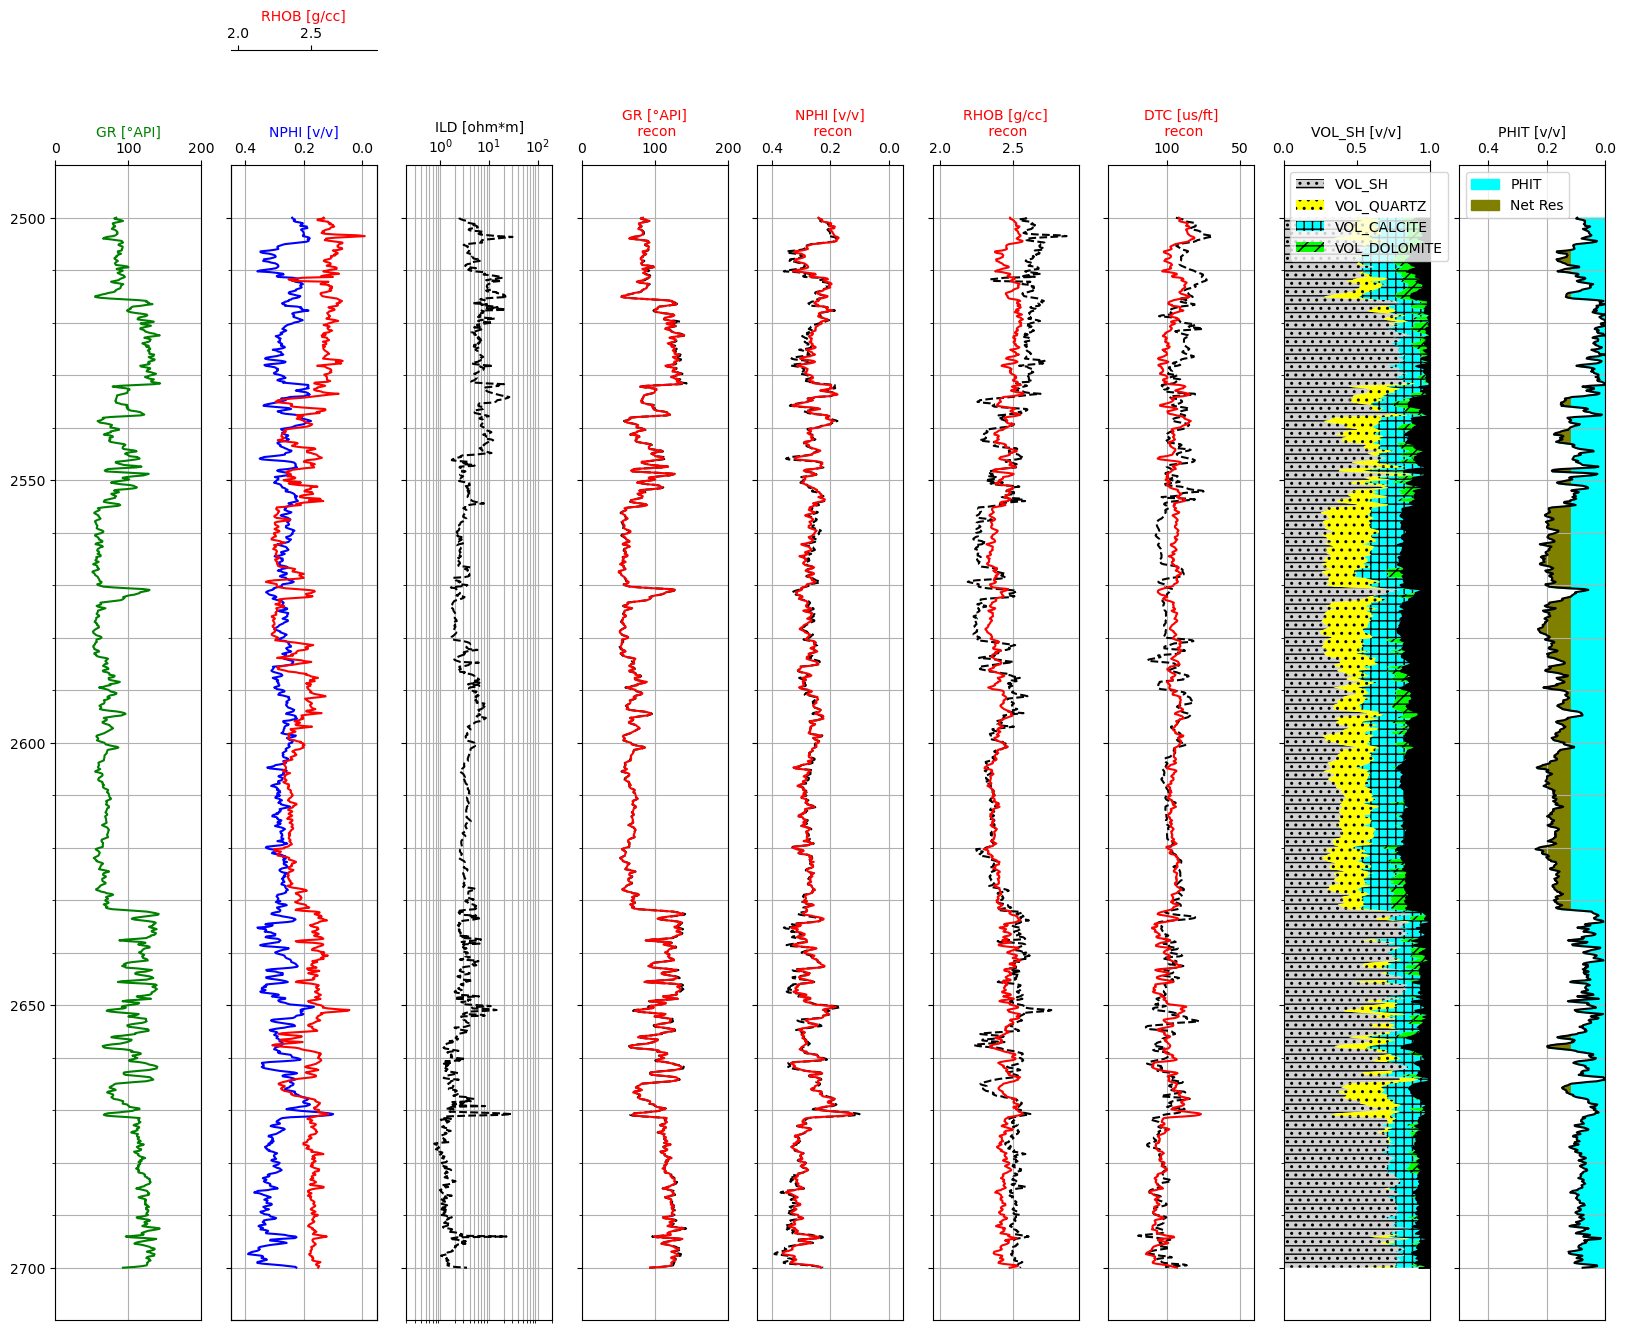

In [8]:
Plot_lith()

# Depth Plot by Depth Range:

In [9]:
int_range_slider = widgets.FloatRangeSlider(
    value  = [2500, 2600] ,
    min    = min(logs.DEPT),
    max    = max(logs.DEPT),
    step   = 1,
    description='Depths:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    #readout=True,
    #readout_format='f',
    slider_color='red',
    color='black'
)


widgets.interactive(Plot_lith2,depth_range  = int_range_slider)

interactive(children=(FloatRangeSlider(value=(2500.0183105, 2600.0), continuous_update=False, description='Dep…